In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
wine = pd.read_csv("./data/winequality-red.csv", sep = ";")
wine.columns = wine.columns.map(lambda x: x.replace(" ", "_"))
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
wine.shape

(1599, 12)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# 탐색적 데이터 분석
wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [7]:
eda_columns = ["fixed_acidity", "volatile_acidity", "citric_acid", "chlorides",
              "total_sulfur_dioxide", "density", "sulphates", "alcohol", "quality"]

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


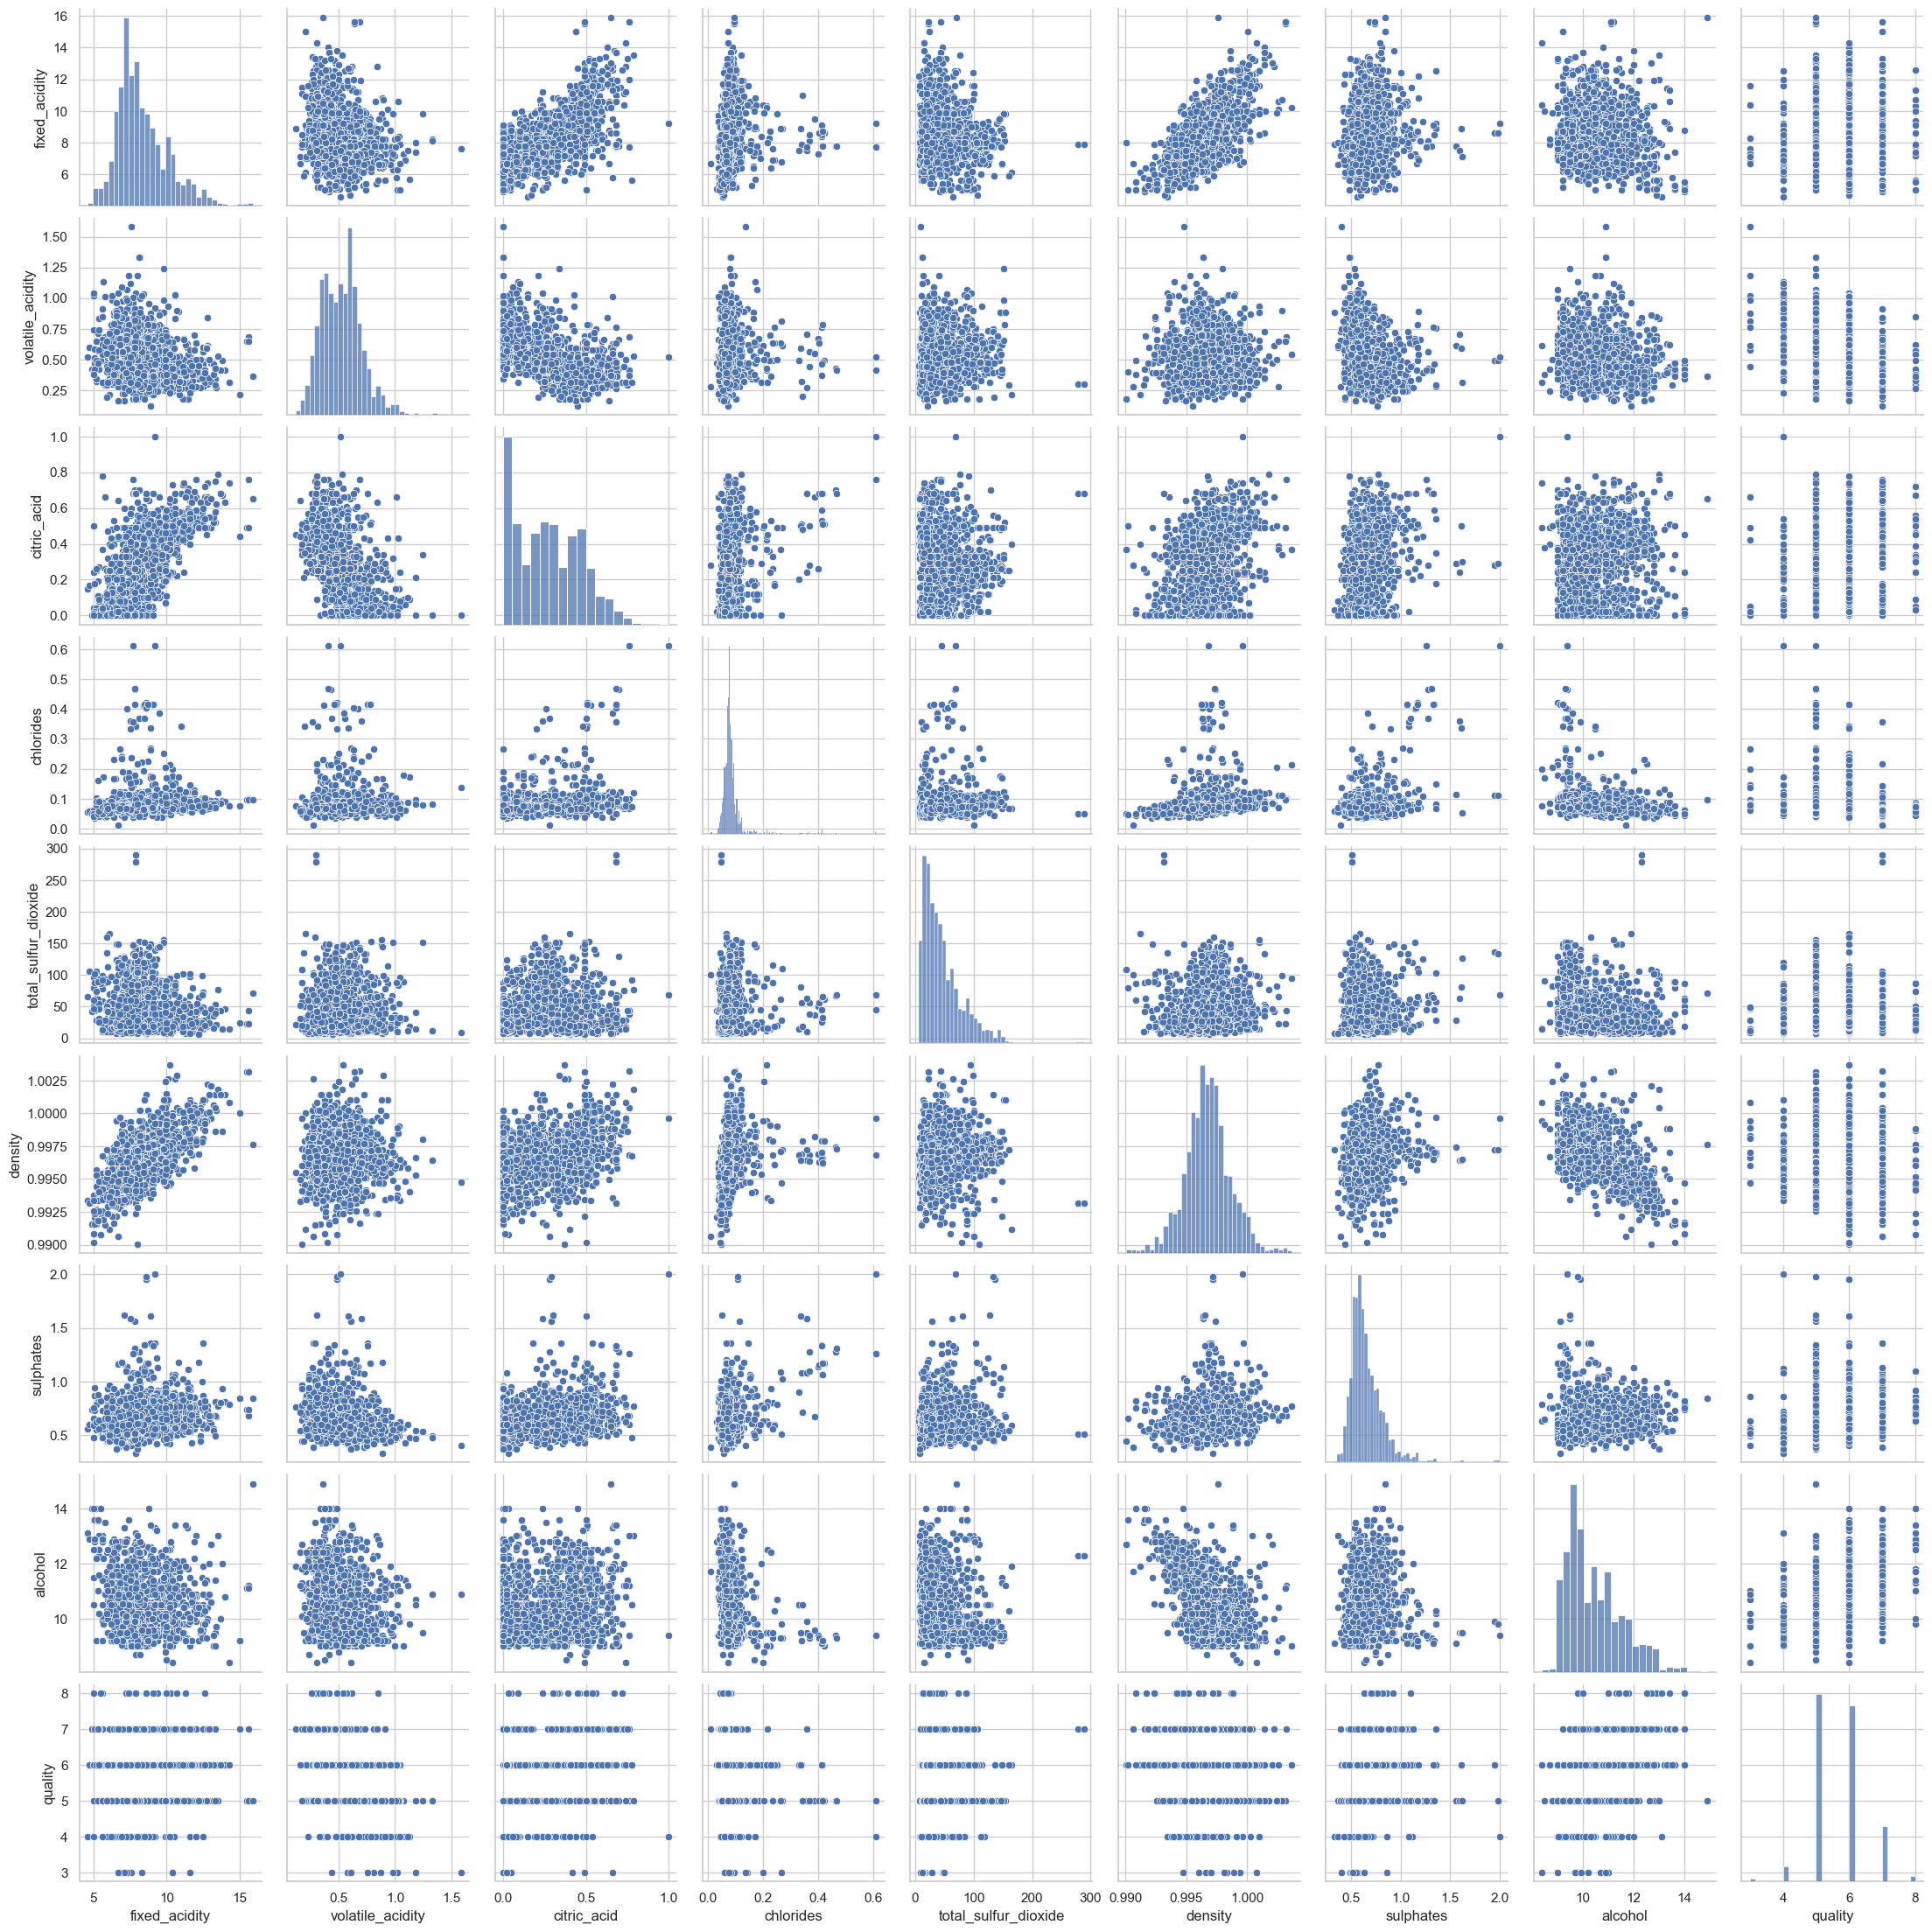

In [8]:
sns.set(style = "whitegrid")
sns.pairplot(wine[eda_columns])
plt.show()

### 상관관계 히트맵

- 쌍 그래프와 함께 수치적 관점의 상관관계를 보여주기 위해
- 초기 단계에서 변수가 너무 많을 경우, 탈락시킬 변수들을 선택하기 위해 사용

In [12]:
corr_mat

array([[ 1.        , -0.25613089,  0.67170343,  0.09370519, -0.11318144,
         0.66804729,  0.18300566, -0.06166827,  0.12405165],
       [-0.25613089,  1.        , -0.55249568,  0.06129777,  0.07647   ,
         0.02202623, -0.26098669, -0.20228803, -0.39055778],
       [ 0.67170343, -0.55249568,  1.        ,  0.20382291,  0.03553302,
         0.36494718,  0.31277004,  0.10990325,  0.22637251],
       [ 0.09370519,  0.06129777,  0.20382291,  1.        ,  0.04740047,
         0.20063233,  0.37126048, -0.22114054, -0.12890656],
       [-0.11318144,  0.07647   ,  0.03553302,  0.04740047,  1.        ,
         0.07126948,  0.04294684, -0.20565394, -0.18510029],
       [ 0.66804729,  0.02202623,  0.36494718,  0.20063233,  0.07126948,
         1.        ,  0.14850641, -0.49617977, -0.17491923],
       [ 0.18300566, -0.26098669,  0.31277004,  0.37126048,  0.04294684,
         0.14850641,  1.        ,  0.09359475,  0.25139708],
       [-0.06166827, -0.20228803,  0.10990325, -0.22114054, -0

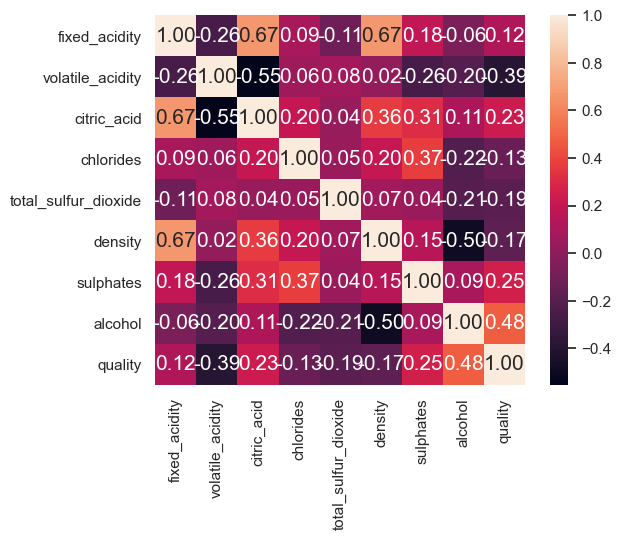

In [11]:
corr_mat = np.corrcoef(wine[eda_columns].values.T)  # 넘파이에서 상관관계 구하는 방법
sns.set()
full_mat = sns.heatmap(corr_mat, cbar = True, annot = True, square = True, fmt = ".2f",
                      annot_kws = {"size" : 15}, yticklabels = eda_columns,
                      xticklabels = eda_columns)

### 변수 선택(후진 제거법, 전진 선택법)

- 후진 제거법(backward elimination)
    - 전체 변수를 대상으로 미리 정의한 모든 통계 수치(유의 수준, 다중공선성 등)를 만족할 때까지 반복적으로 변수를 하나씩 제거
    - 이번 예제에서는 R제곱값이 0.7이상이면 받아들이고 그러지 않으면 기각
    
- 전진 선택법(forward selection)
    - 공집합에서 출발해서 전체 모델의 적합도가 좋아질 때까지 변수를 증가

In [13]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [15]:
pdx = wine[columns]
pdy = wine["quality"]

In [16]:
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(pdx, pdy, test_size = 0.3, random_state = 10)

In [17]:
# x_train, x_test에 상수항 추가
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train, x_train_new)

In [18]:
x_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
305,10.3,0.53,0.48,2.5,0.063,6.0,25.0,0.99980,3.12,0.59,9.3
984,12.2,0.45,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4
47,8.7,0.29,0.52,1.6,0.113,12.0,37.0,0.99690,3.25,0.58,9.5
812,10.8,0.45,0.33,2.5,0.099,20.0,38.0,0.99818,3.24,0.71,10.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8


In [19]:
x_train_new.head()   # 상수항 const 추가

,const,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
305,1.0,10.3,0.53,0.48,2.5,0.063,6.0,25.0,0.99980,3.12,0.59,9.3
984,1.0,12.2,0.45,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4
47,1.0,8.7,0.29,0.52,1.6,0.113,12.0,37.0,0.99690,3.25,0.58,9.5
812,1.0,10.8,0.45,0.33,2.5,0.099,20.0,38.0,0.99818,3.24,0.71,10.8
3,1.0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8


In [20]:
# 모델 훈련(모델 훈련한애를 따로 받는 변수가 있어야함)
full_res = full_mod.fit()

In [21]:
# 모델 요약 출력   
print(full_res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     53.97
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           2.36e-95
Time:                        09:36:45   Log-Likelihood:                -1090.5
No. Observations:                1119   AIC:                             2205.
Df Residuals:                    1107   BIC:                             2265.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.0960 

-  R-squared : 결정계수
- Adj. R-squared : 수정 결정계수
- Prob (F-statistic) : 전체 모델의 p-value
-  P>|t|  : 0.05보다 낮아야 유의미함 (유의수준)

#### VIF

- 다중 공선성 문제
    - 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제
    
- 다중 공선성을 없애는 가장 기본적인 방법
    - 다른 독립변수에 의존하는 변수를 없애는 것
    
- VIF(Variance Inflation Factor)
    - 독립변수를 다른 독립변수로 선형회귀한 성능을 나타낸 것으로, 가장 의존적인 독립변수를 선택할 때 사용

In [22]:
cnames = x_train.columns

In [23]:
cnames

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [24]:
# VIF 계산
for i in np.arange(len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar], sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar, round(vif, 3))

fixed_acidity 7.979
volatile_acidity 1.789
citric_acid 3.336
residual_sugar 1.703
chlorides 1.607
free_sulfur_dioxide 1.98
total_sulfur_dioxide 2.229
density 6.097
pH 3.269
sulphates 1.509
alcohol 2.869


- vif 높을수록 안 좋음

#### 이번 예제에서 살펴볼 척도

- AIC
    - 주어진 데이터셋에 대한 통계 모델의 상대적인 품질 평가
    - 절대 수치는 중요하지 않고, 상대 수치가 적을수록 좋다(모형 적합도가 높다 또는 정보 손실이 적다)
    
- 수정 R 제곱
    - 0.7 이상이어야 함
    
- 개별 변수의 P값
    - 유의확률. 표본 이상으로 극단적인 결과를 얻을 확률
    - 0.05 이하여야 함
    
- 개별 변수의 VIF 
    - 5이하여야 함 (보통 10 ~ 15로 잡긴함, 이번 예제에서만 5로 잡음)

**residual_sugar** 변수가 가장 높은 P값을 갖기 때문에 제거  

    - (높은 P값 : 종속변수와 독립변수들간의 관계X)
- 무의미한 변수가 다중공선성보다 더 심각한 문제를 유발하기 때문
- 최종적으로는 P값이 높은 변수, VIF가 높은 변수 모두 제거되어야 함

# 변수 제거1

- 제거된 변수 : residual_sugar

In [25]:
# 위에서 했던 코드 가져옴 residual_sugar 제거하고,

columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
pdx = wine[columns]
pdy = wine["quality"]
x_train, x_test, y_train, y_test = train_test_split(pdx, pdy, test_size = 0.3, random_state = 10)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train, x_train_new)
full_res = full_mod.fit()
print(full_res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     59.42
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           2.99e-96
Time:                        10:15:04   Log-Likelihood:                -1090.5
No. Observations:                1119   AIC:                             2203.
Df Residuals:                    1108   BIC:                             2258.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.3788 

In [26]:
cnames = x_train.columns
for i in np.arange(len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar], sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar, round(vif, 3))

fixed_acidity 6.38
volatile_acidity 1.789
citric_acid 3.307
chlorides 1.604
free_sulfur_dioxide 1.949
total_sulfur_dioxide 2.225
density 3.988
pH 2.894
sulphates 1.434
alcohol 2.192


- AIC : 2205 => 2203
- 수정 R 제곱 : 0.343 변화없음
- 개별 변수 P값 : density가 가장 무의미
- 개별 변수 VIF : fixed_acidity 가 가장 높음

# 변수 제거2

- 제거된 변수 : residual_sugar, density

In [27]:
columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
       'pH', 'sulphates', 'alcohol']
pdx = wine[columns]
pdy = wine["quality"]
x_train, x_test, y_train, y_test = train_test_split(pdx, pdy, test_size = 0.3, random_state = 10)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train, x_train_new)
full_res = full_mod.fit()
print(full_res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     66.07
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           3.64e-97
Time:                        10:21:24   Log-Likelihood:                -1090.6
No. Observations:                1119   AIC:                             2201.
Df Residuals:                    1109   BIC:                             2251.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.2923 

In [28]:
cnames = x_train.columns
for i in np.arange(len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar], sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar, round(vif, 3))

fixed_acidity 2.977
volatile_acidity 1.753
citric_acid 3.3
chlorides 1.591
free_sulfur_dioxide 1.948
total_sulfur_dioxide 2.172
pH 2.158
sulphates 1.387
alcohol 1.264


- AIC : 2203 => 2201
- 수정 R 제곱 : 0.343 => 0.344 (쬐끔 좋아짐)
- 개별 변수 P값 : fixed_acidity가 가장 무의미
- 개별 변수 VIF : citric_acid 가 가장 높지만 3.3으로 5미만(분산 팽창요인은 신경안써도됨)

# 변수 제거3

- 제거된 변수 : residual_sugar, density, fixed_acidity

In [29]:
columns = ['volatile_acidity', 'citric_acid', 
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
       'pH', 'sulphates', 'alcohol']
pdx = wine[columns]
pdy = wine["quality"]
x_train, x_test, y_train, y_test = train_test_split(pdx, pdy, test_size = 0.3, random_state = 10)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train, x_train_new)
full_res = full_mod.fit()
print(full_res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     74.28
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           5.54e-98
Time:                        10:24:55   Log-Likelihood:                -1090.9
No. Observations:                1119   AIC:                             2200.
Df Residuals:                    1110   BIC:                             2245.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.6606 

In [30]:
cnames = x_train.columns
for i in np.arange(len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar], sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar, round(vif, 3))

volatile_acidity 1.652
citric_acid 2.203
chlorides 1.441
free_sulfur_dioxide 1.937
total_sulfur_dioxide 1.999
pH 1.581
sulphates 1.383
alcohol 1.242


- AIC : 2201 => 2200
- 수정 R 제곱 : 0.344 변화 없음 
- 개별 변수 P값 : citric_acid가 가장 무의미
- 개별 변수 VIF : citric_acid 가 가장 높지만 2.2로 5미만(분산 팽창요인은 신경안써도됨)

# 변수 제거4

- 제거된 변수 : residual_sugar, density, fixed_acidity, citric_acid

In [31]:
columns = ['volatile_acidity', 
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
       'pH', 'sulphates', 'alcohol']
pdx = wine[columns]
pdy = wine["quality"]
x_train, x_test, y_train, y_test = train_test_split(pdx, pdy, test_size = 0.3, random_state = 10)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train, x_train_new)
full_res = full_mod.fit()
print(full_res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     84.73
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           9.92e-99
Time:                        10:27:26   Log-Likelihood:                -1091.4
No. Observations:                1119   AIC:                             2199.
Df Residuals:                    1111   BIC:                             2239.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.3892 

In [32]:
cnames = x_train.columns
for i in np.arange(len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar], sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar, round(vif, 3))

volatile_acidity 1.213
chlorides 1.391
free_sulfur_dioxide 1.903
total_sulfur_dioxide 1.957
pH 1.242
sulphates 1.378
alcohol 1.182


- AIC : 2200 => 2199 (좋아진거임)
- 수정 R 제곱 : 0.344 변화 없음 
- 개별 변수 P값 : free_sulfur_dioxide 가 가장 무의미
- 개별 변수 VIF : total_sulfur_dioxide 가 가장 높지만 1.9로 5미만(분산 팽창요인은 신경안써도됨)

# 변수 제거5

- 제거된 변수 : residual_sugar, density, fixed_acidity, citric_acid, free_sulfur_dioxide

In [33]:
columns = ['volatile_acidity', 
       'chlorides', 'total_sulfur_dioxide',
       'pH', 'sulphates', 'alcohol']
pdx = wine[columns]
pdy = wine["quality"]
x_train, x_test, y_train, y_test = train_test_split(pdx, pdy, test_size = 0.3, random_state = 10)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train, x_train_new)
full_res = full_mod.fit()
print(full_res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     98.43
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           2.59e-99
Time:                        10:29:58   Log-Likelihood:                -1092.4
No. Observations:                1119   AIC:                             2199.
Df Residuals:                    1112   BIC:                             2234.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.3044 

In [34]:
cnames = x_train.columns
for i in np.arange(len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar], sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar, round(vif, 3))

volatile_acidity 1.202
chlorides 1.39
total_sulfur_dioxide 1.046
pH 1.211
sulphates 1.378
alcohol 1.181


- AIC : 2199 변화없음
- 수정 R 제곱 : 0.344 => 0,343 충분하지 못함 (다시 낮아진거는 모델성능 안좋아졌단거임)
- 개별 변수 P값 : 무의미한 변수는 모두 제거함(0.05 미만이면 다 괜츈)
- 개별 변수 VIF : 모든 변수가 5보다 작음

**결론 : 독립 변수와 종속 변수 사이에 어떤 강한 관계도 존재하지 않는다**

In [35]:
y_pred = full_res.predict(x_test_new)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ["y_pred"]   # 컬럼명 수정

pred_data = pd.DataFrame((y_pred_df["y_pred"]))   # 따로 생성
y_test_new = pd.DataFrame(y_test)   # 정답값
y_test_new.reset_index(inplace = True)
pred_data["y_test"] = pd.DataFrame(y_test_new["quality"])

In [36]:
rsqd = r2_score(y_test_new["quality"].tolist(), y_pred_df["y_pred"].tolist())   # r2_score : 결정계수
print(round(rsqd, 4))

0.3706
